In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
print(iris.DESCR)
#꽃받침 sepal
#꽃잎 petal
#길이와 너비값 분류문제에 많이 이용되는 데이터

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
import seaborn as sns

In [6]:
iris_pd =sns.load_dataset('iris')
iris_pd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


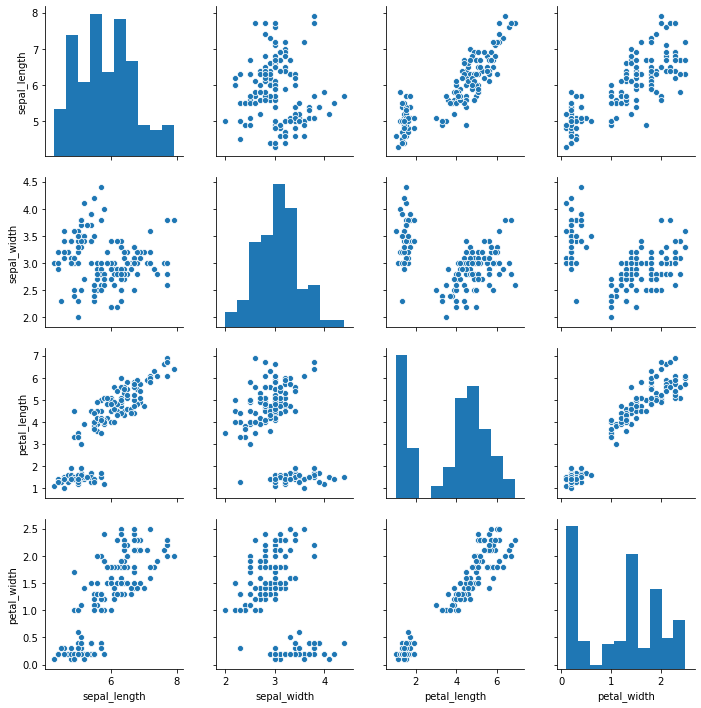

In [7]:
sns.pairplot(iris_pd)

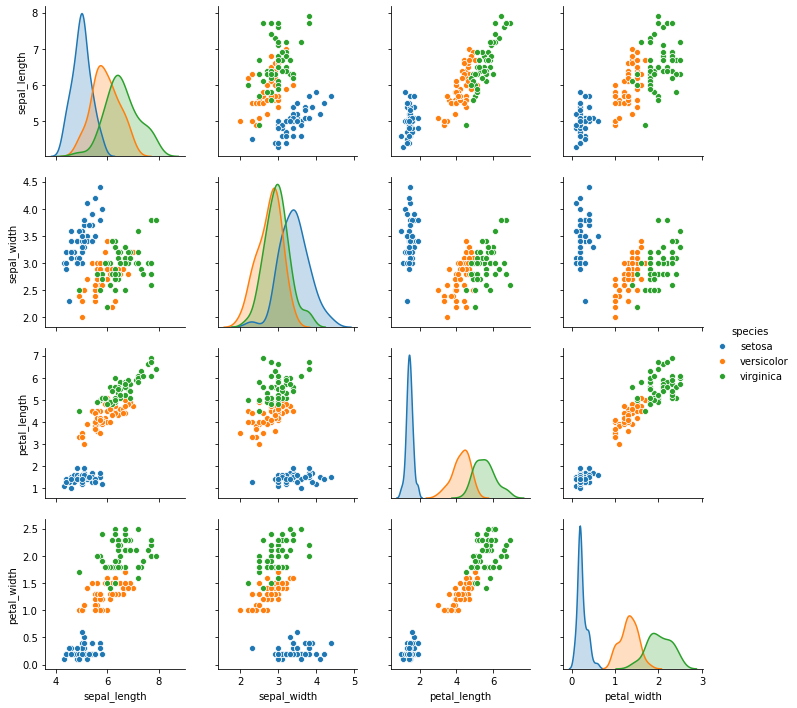

In [8]:
sns.pairplot(iris_pd,hue='species')
#sepal 꽃받침
#petal 꽃잎



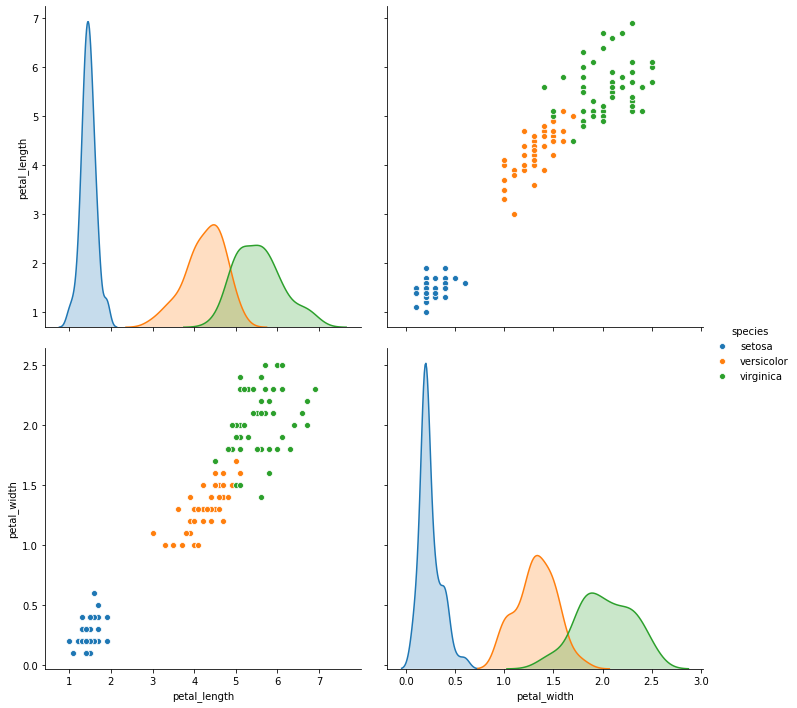

In [9]:
sns.pairplot(iris_pd,height=5,vars=['petal_length','petal_width'],hue='species')

In [10]:
from sklearn.tree import DecisionTreeClassifier

X =iris.data[:, 2:]
y =iris.target

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=13)
tree_clf.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [12]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=["petal length","petal width"],
        class_names=iris.target_names,
        rounded=True,
        filled=True

)

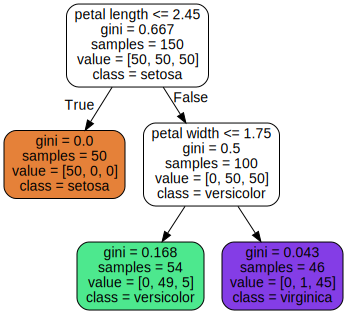

In [13]:
import graphviz
with open("iris_tree.dot") as f:
    dot_graph = f.read()
    
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree',directory='images/decision_trees', cleanup=True)
dot

In [16]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
tree_clf.predict([[5,1.5]])

array([1])

In [19]:
iris.target_names[tree_clf.predict([[5,1.5]])]

array(['versicolor'], dtype='<U10')